In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
raw_nyt_data = pd.read_table("nyt_data.txt", header = None)
dictionary = np.array(pd.read_table("nyt_vocab.dat", header = None))

In [302]:
dic_nyt_data = raw_nyt_data.to_dict()[0]
x_m = np.zeros(shape = (3012, 8447))

In [303]:
#construct the non-negative matrix 
for i in range(len(dic_nyt_data)):
    count += 1
    for pair in dic_nyt_data[i].split(","):
        x_m[int(pair.split(":")[0]) - 1][i] = int(pair.split(":")[1])

In [304]:
#define the funciton to implement the algorithms
def initialize():
    w_m = np.random.rand(3012, 25) + 1
    h_m = np.random.rand(25, 8447) + 1
    return w_m, h_m

In [305]:
#define the function to normalized the row
def normalized_row(matrix):
    row_sum = matrix.sum(axis = 1)
    return matrix / row_sum[:, np.newaxis]

In [306]:
#define the funciton to normalized the column
def normalized_col(matrix):
    col_sum = matrix.sum(axis = 0)
    return matrix / col_sum
    

In [307]:
#define the function to calculate the value of object function
def objective(w, h):
    wh = w.dot(h)
    wh_nozero = np.where(wh == 0, 10**-16, wh)
    temp = np.log(1.0 / wh_nozero)
    part1 = x_m * temp
    result = part1 + wh
    return np.sum(result)


In [308]:
#define the function to excute iterations
def update(w, h):
    result = []
    for t in range(100):
        temp = np.where(w.dot(h) == 0, 10**-16, w.dot(h))
        purple1 = x_m / temp
        pink = normalized_row(w.T)
        part1 = pink.dot(purple1)
        h = h * part1
        temp1 = np.where(w.dot(h) == 0, 10 ** -16, w.dot(h))
        purple2 = x_m / temp1
        lightblue = normalized_col(h.T)
        part2 = purple2.dot(lightblue)
        w = w * part2
        result.append(objective(w, h))
    return w, h, result

In [309]:
w_m, h_m = initialize()
w_result, h_result, object_function = update(w_m, h_m)

#### 1) Implement and run the NMF algorithm on this data using the divergence penalty. Set the rank to 25 and run for 100 iterations. This corresponds to learning 25 topics. Plot the objective as a function of iteration.

In [310]:
plt.plot(range(1, 101), object_function)

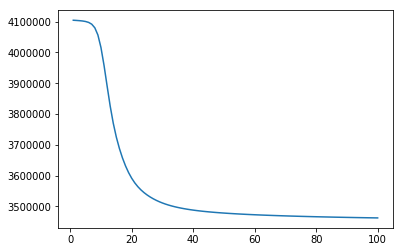

In [311]:
plt.show()

In [312]:
#normalized the w after the algorithms
w_normalized = normalized_col(w_result)


#### b) After running the algorithm, normalize the columns of W so they sum to one. For each column of W , list the 10 words having the largest weight and show the weight. The ith row of W corresponds to the ith word in the “dictionary” provided with the data. Organize these lists in a 5 × 5 table.

In [313]:
index = w_normalized.argsort(axis = 0)[-10:,][::-1]
weight = np.sort(w_normalized, axis = 0)[-10:,][::-1]

In [314]:
words = dictionary[index].reshape(25,10)
table = []
for i in range(25):
    concatenate = []
    temp = np.concatenate((words[i,:].reshape(10,1), weight[:,i].reshape(10, 1)),axis = 1)
    for j in range(10):
        concatenate.append(temp[j][0] + ' ' + str(temp[j][1]))
    table.append(concatenate)
table = np.array(table)
list_table = {}
for j in range(5):
    list_table[j] = table[j*5:j*5 + 5].T

In [315]:
pd.DataFrame(list_table[0], columns = ["topics1", "topics2", "topics3", "topics4", "topics5"])

,topics1,topics2,topics3,topics4,topics5
0,car 0.0150092413445,room 0.02082323032,computer 0.0171488411658,plant 0.0143662693451,health 0.0191546958553
1,vote 0.014054623539,money 0.0198605773385,school 0.0105385418583,mother 0.013505370721,market 0.0170279729985
2,art 0.0130658812432,states 0.0190707213885,game 0.00919166914405,president 0.011405877771,kill 0.0121786380766
3,military 0.012941647917,food 0.0147957855375,tell 0.00837494093339,building 0.0112734395794,rate 0.0118464913597
4,music 0.0126966164967,official 0.0147630516137,case 0.00789590923468,thing 0.0105078920259,editor 0.0100490034046
5,water 0.012101101647,drug 0.0145068613969,train 0.00788001549512,walk 0.00990875117244,store 0.00933263182753
6,father 0.0115352552593,company 0.0141107363362,campaign 0.00740454677073,pay 0.00925680322453,student 0.00851461920874
7,executive 0.0111881394338,police 0.0119350274291,artist 0.00716449818103,country 0.00812501952184,play 0.00832496457891
8,city 0.0109939909388,percent 0.0118458752572,war 0.0071251386721,serve 0.00700144474328,life 0.00820928798108
9,question 0.0103013259023,news 0.011448322081,play 0.0067424016767,information 0.00694223581522,court 0.0080823030761


In [316]:
pd.DataFrame(list_table[1], columns = ["topics6", "topics7", "topics8", "topics9", "topics10"])

,topics6,topics7,topics8,topics9,topics10
0,travel 0.0193539487023,home 0.0502793709068,design 0.021509660381,gas 0.0208277531719,study 0.00786338684363
1,political 0.018894885592,budget 0.0420963189303,class 0.0210902556928,mrs 0.0205691734663,sell 0.00673539376829
2,collection 0.0162997514777,american 0.0419275962065,team 0.0150355831064,chief 0.0159092983012,officer 0.00641095508157
3,leader 0.00995751359408,restaurant 0.0394799892312,man 0.0131670265589,project 0.0135683423552,low 0.00633921870101
4,film 0.00919093085185,report 0.0361628955659,lawyer 0.0130096914622,feel 0.0123355034268,newspaper 0.0057927422512
5,oil 0.00914135401525,doctor 0.0326478465452,service 0.0124838853839,night 0.0119331681829,machine 0.00568009161182
6,son 0.00850267231486,price 0.0261583025639,party 0.01177323051,tax 0.011168905633,child 0.00564515071611
7,contract 0.00838131881961,man 0.0242079982626,museum 0.0111549352792,world 0.0106180021156,win 0.00554045014167
8,build 0.00837963062956,increase 0.0222292185133,government 0.0111176895575,taste 0.0102227609498,write 0.00553261301676
9,sense 0.00822170621751,article 0.0197972133479,performance 0.0103499280998,question 0.0101297902529,charge 0.00552002447102


In [317]:
pd.DataFrame(list_table[2], columns = ["topics11", "topics12", "topics13", "topics14", "topics15"])

,topics11,topics12,topics13,topics14,topics15
0,station 0.0139185458424,house 0.0192843977695,technology 0.0422072627253,state 0.0156070155123,patient 0.0148738062453
1,republican 0.0084872442815,bill 0.0183409365988,program 0.0413743174786,daughter 0.0106044423444,stock 0.0107651528299
2,photograph 0.00812725956407,economic 0.0139530650717,season 0.0342036086236,name 0.00958776442518,fire 0.0103077417064
3,official 0.00792795729776,fresh 0.0137307123596,book 0.0245725871916,area 0.0090215384018,average 0.00984456111591
4,audience 0.00789031140634,issue 0.0132715684438,law 0.0178310051354,problem 0.00863699499015,conference 0.00947850616686
5,damage 0.00741238085652,medical 0.0130338767778,hour 0.0167097294082,sit 0.00757360683476,company 0.00834890807667
6,family 0.00735052120434,sale 0.0123174612026,candidate 0.0161617799196,state 0.00754133165747,college 0.00699034602417
7,director 0.00706809188533,attack 0.0115563757763,century 0.0150995846243,nation 0.00726817127564,player 0.00698736695995
8,resident 0.00703220952317,rise 0.0112698852769,force 0.0132431902311,add 0.00726425413123,thing 0.00678913740113
9,view 0.00667633499002,television 0.010560333727,movie 0.011853719362,public 0.0070706733416,judge 0.00628620482911


In [318]:
pd.DataFrame(list_table[3], columns = ["topics16", "topics17", "topics18", "topics19", "topics20"])

,topics16,topics17,topics18,topics19,topics20
0,driver 0.0170761759342,visit 0.0345804467273,line 0.0306523732749,ship 0.0385099099492,treatment 0.0337374391856
1,election 0.0153021385971,cost 0.0252882760323,education 0.0220101448973,graduate 0.0191106341898,buy 0.0238808464425
2,book 0.0143487360953,government 0.0199250794915,second 0.0187116089012,company 0.0157509854588,death 0.0202015403201
3,american 0.0136033110524,cook 0.0182670716866,friend 0.0156899534138,property 0.0153869834028,report 0.0164439818399
4,production 0.0126348758435,concern 0.0182064765443,trial 0.0105259999658,understand 0.0145829824389,speak 0.0152148457718
5,mile 0.0117978059294,research 0.015061436743,flight 0.0104642063802,live 0.0137757503038,system 0.0124466103918
6,child 0.0116291188236,share 0.0141165994557,leader 0.0104518437583,program 0.012764238811,teacher 0.0121588511693
7,yesterday 0.0109319688461,arrest 0.0139228792435,exhibition 0.00999331411739,foreign 0.0113573507522,victory 0.0104020724251
8,plan 0.00920127160101,number 0.0124169623852,peace 0.00896236189284,pound 0.0107654413336,love 0.0103601537677
9,idea 0.00847336126097,reporter 0.0116153787106,theater 0.00874804908853,ask 0.0102201095996,legal 0.0101474047942


In [319]:
pd.DataFrame(list_table[4], columns = ["topics21", "topics22", "topics23", "topics24", "topics25"])

,topics21,topics22,topics23,topics24,topics25
0,plane 0.0119127017605,place 0.0530535436935,available 0.020691844867,power 0.013472925337,scientist 0.0264970119033
1,democratic 0.0101147097385,cut 0.0377692978909,parent 0.0173088852128,wife 0.0132863717125,industry 0.025001136559
2,history 0.00711475877027,americans 0.0178886827919,score 0.0171925347829,board 0.0129569215011,official 0.0226812867859
3,nations 0.00702196432029,cup 0.0176968954296,young 0.0139301883847,site 0.0113403184405,level 0.0213764504436
4,stage 0.00663666098352,require 0.0174661249871,state 0.0135827880088,great 0.0112059111127,member 0.0189293198679
5,supply 0.00648247754279,cause 0.0168393049906,traffic 0.0135475017824,stand 0.0110794926619,model 0.0179076462851
6,marry 0.00618065662807,business 0.0161018782819,state 0.0116314204132,plan 0.0089419804031,teach 0.0131385451849
7,employee 0.00601546288574,crime 0.0136597532554,image 0.00830337955555,international 0.00859945522945,start 0.0124374930112
8,community 0.00563311603015,point 0.0124129101714,troop 0.0077990308486,red 0.00809236808865,story 0.0113716853507
9,point 0.00529527372347,meeting 0.00983334939394,dance 0.00774908015289,process 0.00792005904615,prosecutor 0.0101775382466
